# 2017 Deep RL Bootcamp

## Lecture 1: Motivation + Overview + Exact Solution Method
[VIDEO](https://www.youtube.com/watch?v=qaMdN6LS9rA)

[0 - 10] Starts off with a review of MDPs from Barto, and then sets up a simple grid world with an example of a deterministic policy with infinite horizon. 

[10-20] OMG, talk gets a bit derailed by series of rando questions that don't seem to be clarifying thinking (answerable by the definition of a deterministic policy). Maybe too much coffee? 

[20-30] Nice introduction to value iteration by showing how, in a stochastic model, it is safer to stay put if it is unlikely movement will yield a successful return. Also, there was a nice set up for the value iteration converging, as additional time will not help an optimal path towards an exit condition once it's been reached. 

[30-40] This helped me solidify why a low gamma would lead us to prioritize immediate rewards, while a high gamma leads us to hold out for larger rewards in future steps. He mentioned how Q* encodes implicitly the best policy, so it is combo of the V* and \pi* from value iteration (because Q is defined as "and thereafter act optimally", which will require the best policy). 

[40-50] Nice introduction to policy evaluation, where we see that \pi(a) gives us the next action as defined by the policy, so we're now working in a linear system. We can add an argmax(a) to the evaluation to get an improvement, as this will be the best a we could select where all future values will be generated optimally. And finally, we can solve iteratively or solve the system of linear equations (woot woot linear algebra). Oh, and a nice example of the geometric series (the gamma coeficient).

[50-60] A proof sketch for why optimal convergence is reached with policy iteration. 

## Lecture 2: Sampling-based Approximations and Function Fitting
[Video](https://www.youtube.com/watch?v=qO-HUo0LsO4)

[0-10] So...with Q-learning we have made two big assumptions: 1) the underlying dynamics that give us P(s' | s, a), and 2) the states and actions can't be too large because we need to store the probabilities to be able to look them up. We may not always be able to meet these assumptions, so enter sampling-based approximation (starting with tabular Q-learning), where we sample states and keep a running average as our Q-value for a given (s, a).

[10-20] Diving into model-free methods. I LOVED that he used the term "temperature" to describe the shift in weighting that we see in something like a simulated annealing algorithm. I'm starting to see that a lot in RL (especially with the discount function), and I like this somatic layer of temperature. In this case, we are seeking to balance explore-exploit with an \epsilon-greedy algorithm.

[20-30] A brief introduction to on-policy learning (where sampling is done based on a policy, and those samples are used to update that policy) vs. off-policy learning where we sample based on one policy, but are ultimately updating (learning about) another policy. The requirements for q-learning are also given, which are: all states and actions are visited infinitely often, learning rate sum equals infinity as we approach infinity and the sum of squares of the learning rate is defined as we approach infinity. Exploration is a core RL challenge, and there may be situations where even epsilon-greedy doesn't converge in a reasonable amount of time. 

[30-40] As long as there is an optimal path pursued towards a rewarded state, we won't need to propagate negative rewards back in time (this was shown in a gridworld example). At some point we converge to the Q-values of each state, so additional iterations won't change their values. 

[40-50] Briefly touched upon Temporal Difference Learning as a way to take samples and not just expected values from the policy evaluation. But the main purpose of this section was drive the story towards deep RL, where we will use neural networks to to approximate Q values without needing to hand-engineer features. To step in this direction, was saw how tabular Q-learning is a special case of approximate Q-learning. 

## Lecture 3: Deep Q-Networks
[Video](https://www.youtube.com/watch?v=fevMOp5TDQs&t=131s)

[0-10] Vlad Mnih frames the problem nicely about the moving target we get when when we use neural networks to generate our Q-function. Essentially, the generalization of states in neural networks makes the targets unstable. He proposes a clever solution, which is to create an experience replay buffer, which will, in a sense, create a steady data set that can be sampled from. This will break correlations we would have got in our online gradient updates, delivering us a "steadier learning signal". In general, in approaching their 2015 work on the Atari control problem they tried to see how they could frame the problem as a supervised learning problem. 

[10-20] After a series of questions that I could not hear the questions to, Vlad switched gears to extol the virtues of target networks, sharing insight into how they care important or stability. This is particularly important when we might project our increased Q-value from a previous state onto an unsuspecting state that looks similar, yet over time we may be over-increasing. 

[20-30] A walk through the DQN algorithm, which I've pasted below, and some really memorable words about optimization. "Optimization really matters in RL, because how you update your neural network determines which actions you will take, which determines which data you will see. Optimization algorithms affect the dynamics of your agent." To this end, he gave a shout out to RMSProp and Adam, which he and his colleagues have found to be preferable to SGD in many cases. 

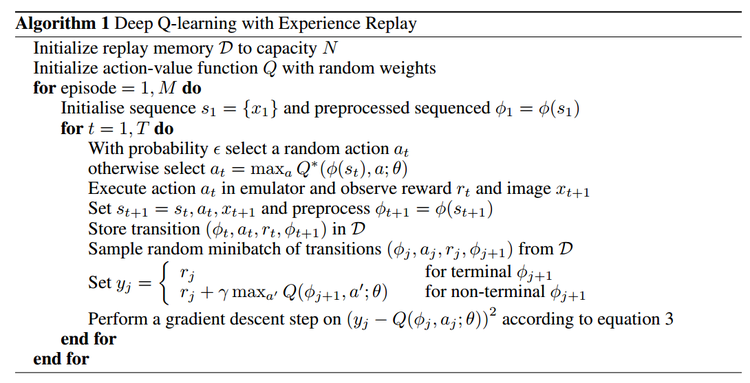

[30-40] Introduces the 49 Atari games they trained on, where they were mapping pixels to Q-values (leading to actions). Convolutional neural networks provided the mapping. In answering a question, here shared this is not a MDP, because we would have to define all the states, and that is not what's happening. I'm including a frame of the architecture below. Scores were best with experience replay and target network stabilization.

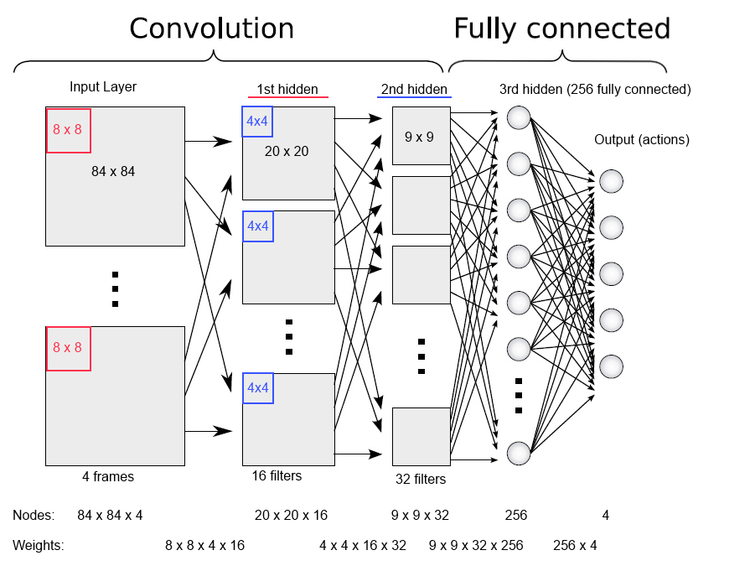

[40-50] Visual exploration of their simulations, with DQN working best on the reactive games. Particular attention placed to the ability to sacrifice immediate rewards for long-term gain. 

[50-60] DQN is an adaptation of neural fitted Q iteration (NFQ), where we just train one CNN (as they are expensive to train) and we simulate the fixed network with the experience replay (that we sample from) and the target network. Vlad also shares the improved algorithms that have come out since their paper, including Double DQN, which balances performance across two networks (online and target network), as well as Prioritized Experience Replay, which replays transitions in proportion to the absolute Bellman error -- essentially prioritizing "states in which we're currently more wrong". And then finally, dueling DQN. This requires changing the architecture of the CNN to track advantage (q values minus state values), which makes it easier to "separate the values of separate actions". 

Vlad also mentioned that you can increase exploration by adding noise to the parameters, which makes intuitive sense. 